# Libraries

In [1]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style('darkgrid')

# Others
import openpyxl
import xlrd
import os
import io
import warnings
import statistics

In [2]:
# Metrics from Sklearn
from sklearn import metrics
from sklearn import set_config
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Models Regression from Sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [3]:
# Regression
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
set_config(display="text")  # displays text representation of estimators
plt.rcParams["figure.figsize"] = [7.2, 4.8]

# Input Dataset for Model

In [6]:
# Dados dos empregados com vinculo ativo em 31/12 apenas da industria da transformação do ano de 2021
df_ind_trans = pd.read_csv(r"DF_Industria_tranformacao_2021.csv", sep=";", encoding='UTF-8', low_memory=False)
df_ind_trans.shape

(1146857, 24)

In [7]:
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_2.0_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046


In [8]:
df_ind_trans = df_ind_trans.rename(columns={'Escolaridade_após_2005': 'Escolaridade', 'CNAE_2.0_Subclasse_targetencoder_': 'CNAE_Subclasse_targetencoder_'})

In [9]:
df_ind_trans.columns

Index(['id', 'Faixa_Etária', 'Faixa_Hora_Contrat', 'Faixa_Tempo_Emprego',
       'Escolaridade', 'Qtd_Hora_Contr', 'Idade', 'Ind_Simples',
       'Ind_Portador_Defic', 'Qtd_Dias_Afastamento', 'Raça_Cor',
       'Vl_Remun_Dezembro_Nom', 'Sexo_Trabalhador', 'Tamanho_Estabelecimento',
       'Tempo_Emprego', 'Tipo_Admissão', 'Tipo_Defic', 'Ind_Trab_Intermitente',
       'Ind_Trab_Parcial', 'CNAE_Subclasse_targetencoder_',
       'Tipo_Vínculo_targetencoder_', 'IBGE_Subsetor_targetencoder_',
       'CBO_targetencoder_', 'cidades_targetencoder_'],
      dtype='object')

In [10]:
df_ind_trans = df_ind_trans[['id', 'Faixa_Hora_Contrat', 
       'Escolaridade', 'Qtd_Hora_Contr', 'Idade', 'Ind_Simples',
       'Ind_Portador_Defic', 'Raça_Cor',
       'Vl_Remun_Dezembro_Nom', 'Sexo_Trabalhador', 'Tamanho_Estabelecimento',
       'Tipo_Admissão', 'Tipo_Defic', 'Ind_Trab_Intermitente',
       'Ind_Trab_Parcial', 'CNAE_Subclasse_targetencoder_',
       'Tipo_Vínculo_targetencoder_', 'IBGE_Subsetor_targetencoder_',
       'CBO_targetencoder_', 'cidades_targetencoder_']]

# Split Dataset into Train and Test

In [11]:
df_model = df_ind_trans.sample(frac = 0.5)
df_model.shape

(573428, 20)

In [12]:
df_seleted = df_model[['id']]
df_seleted['Select'] = 1
df_seleted.shape

C:\Users\luand\AppData\Local\Temp\ipykernel_2852\3788505534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleted['Select'] = 1


(573428, 2)

In [13]:
df_ind_trans = df_ind_trans.merge(df_seleted, on=['id'], how='left')
df_ind_trans['Select'] = df_ind_trans['Select'].fillna(0)
df_ind_trans.head()

,id,Faixa_Hora_Contrat,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_,Select
0,0,6,1,44,50,1,0,4,1372.730,1,4,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986,0.000
1,1,1,1,1,61,0,0,2,1340.190,1,7,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,0.000
2,2,5,1,36,68,0,0,8,2263.800,1,7,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,1.000
3,3,6,1,44,28,1,0,2,2083.360,1,3,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877,1.000
4,4,6,1,44,64,0,0,4,1417.420,1,6,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046,0.000


In [14]:
df_ind_trans['Select'].value_counts()

Select
0.000    573429
1.000    573428
Name: count, dtype: int64

In [15]:
df_ind_trans.head()

,id,Faixa_Hora_Contrat,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_,Select
0,0,6,1,44,50,1,0,4,1372.730,1,4,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986,0.000
1,1,1,1,1,61,0,0,2,1340.190,1,7,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,0.000
2,2,5,1,36,68,0,0,8,2263.800,1,7,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,1.000
3,3,6,1,44,28,1,0,2,2083.360,1,3,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877,1.000
4,4,6,1,44,64,0,0,4,1417.420,1,6,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046,0.000


# Making Dataset de Train and Test

In [16]:
df_train = df_ind_trans[(df_ind_trans['Select'] == 1)]
df_test = df_ind_trans[(df_ind_trans['Select'] == 0)]
df_train.shape, df_test.shape

((573428, 21), (573429, 21))

In [17]:
df_train = df_train.drop(columns=['Select'])
df_test = df_test.drop(columns=['Select'])
df_train = df_train.set_index(['id'])
df_test = df_test.set_index(['id'])
df_train.shape, df_test.shape

((573428, 19), (573429, 19))

# View of Correlation

<Axes: >

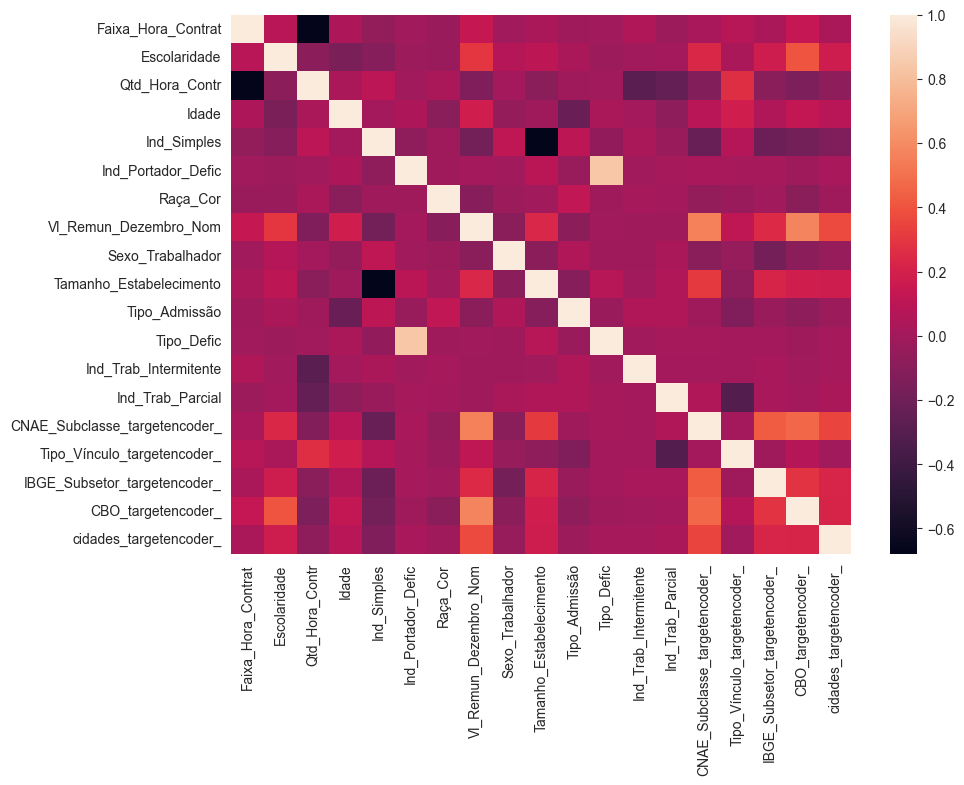

In [18]:
#plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.figsize"] = [10, 7]
cormat = df_train.corr()
#sns.heatmap(cormat, annot=True)
sns.heatmap(cormat)

# Separating the variables - first part

In [19]:
X = df_train.drop(columns='Vl_Remun_Dezembro_Nom')
y = df_train['Vl_Remun_Dezembro_Nom']
X.shape, y.shape

((573428, 18), (573428,))

In [20]:
random_ = 2023
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=random_)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((458742, 18), (114686, 18), (458742,), (114686,))

In [21]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [22]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Linear Regression

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [24]:
# print the intercept
print(lin_reg.intercept_)

3298.1814057574834


In [25]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Faixa_Hora_Contrat,302.430
Escolaridade,377.575
Qtd_Hora_Contr,-85.516
Idade,470.524
Ind_Simples,20.880
Ind_Portador_Defic,-57.871
Raça_Cor,-163.324
Sexo_Trabalhador,-160.733
Tamanho_Estabelecimento,255.857
Tipo_Admissão,-109.045


In [26]:
pred = lin_reg.predict(X_test)

In [27]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1589.6606208195901
MSE: 14178064.571800232
RMSE: 3765.377082285416
R2 Square 0.4885452398050131
__________________________________
Train set evaluation:
_____________________________________
MAE: 1582.2875383961834
MSE: 13367049.600341674
RMSE: 3656.097591742003
R2 Square 0.4909085449728794
__________________________________


# Random Sample Consensus - RANSAC

In [28]:
model = RANSACRegressor(estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 37901.44487500648
MSE: 122570242990.64774
RMSE: 350100.3327485533
R2 Square -4420.557957953579
__________________________________
Train set evaluation:
_____________________________________
MAE: 38214.47179323796
MSE: 123752730323.86844
RMSE: 351785.06267871644
R2 Square -4712.190975407669
__________________________________


# Ridge Regression

In [29]:
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1589.5774645905706
MSE: 14178133.294170778
RMSE: 3765.3862078372226
R2 Square 0.48854276073719893
__________________________________
Train set evaluation:
_____________________________________
MAE: 1582.2028717293383
MSE: 13367049.88272401
RMSE: 3656.0976303600005
R2 Square 0.49090853421819247
__________________________________


# LASSO Regression

In [30]:
model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1608.861288377628
MSE: 14330897.944623962
RMSE: 3785.617247507196
R2 Square 0.48303197982150137
__________________________________
Train set evaluation:
_____________________________________
MAE: 1601.0388539649687
MSE: 13509961.984534726
RMSE: 3675.590018559568
R2 Square 0.4854656480146474
__________________________________


# Elastic Net

In [31]:
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1585.8501323821504
MSE: 14181804.679014228
RMSE: 3765.8736939804858
R2 Square 0.4884103204280734
__________________________________
Train set evaluation:
_____________________________________
MAE: 1578.4100208592815
MSE: 13367638.120641662
RMSE: 3656.17807561963
R2 Square 0.49088613085272625
__________________________________


# Polynomial Regression

In [32]:
poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1228.5998862750796
MSE: 9498227.939701954
RMSE: 3081.919521937903
R2 Square 0.6573641015262521
__________________________________
Train set evaluation:
_____________________________________
MAE: 1224.3493777084943
MSE: 8881626.538904775
RMSE: 2980.205788012763
R2 Square 0.6617383556665379
__________________________________


# Stochastic Gradient Descent

In [33]:
sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1589.9605237655442
MSE: 14177884.045894073
RMSE: 3765.353110386073
R2 Square 0.48855175203618373
__________________________________
Train set evaluation:
_____________________________________
MAE: 1582.5884202297468
MSE: 13367052.535228118
RMSE: 3656.097993110704
R2 Square 0.49090843319611077
__________________________________


# Artficial Neural Network

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Dense, Activation, Dropout
# from tensorflow.keras.optimizers import Adam

In [ ]:
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

# model = Sequential()

# model.add(Dense(X_train.shape[1], activation='relu'))
# model.add(Dense(32, activation='relu'))
# # model.add(Dropout(0.2))

# model.add(Dense(64, activation='relu'))
# # model.add(Dropout(0.2))

# model.add(Dense(128, activation='relu'))
# # model.add(Dropout(0.2))

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1))

# model.compile(optimizer=Adam(0.00001), loss='mse')

# r = model.fit(X_train, y_train,
#               validation_data=(X_test,y_test),
#               batch_size=1,
#               epochs=100)

In [ ]:
# test_pred = model.predict(X_test)
# train_pred = model.predict(X_train)

# print('Test set evaluation:\n_____________________________________')
# print_evaluate(y_test, test_pred)

# print('Train set evaluation:\n_____________________________________')
# print_evaluate(y_train, train_pred)

# results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
#                             columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
# results_df = pd.concat([results_df, results_df_2], ignore_index=True)

# Random Forest Regressor

In [34]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 945.9287824624207
MSE: 7429326.462926809
RMSE: 2725.6790828941707
R2 Square 0.7319969615553787
__________________________________
Train set evaluation:
_____________________________________
MAE: 379.9420144558348
MSE: 1267217.9769660006
RMSE: 1125.7077671251986
R2 Square 0.9517373045646771
__________________________________


# Support Vector Machine

In [ ]:
# svm_reg = SVR(kernel='rbf', C=1000, epsilon=0.001)
# svm_reg.fit(X_train, y_train)

# test_pred = svm_reg.predict(X_test)
# train_pred = svm_reg.predict(X_train)

# print('Test set evaluation:\n_____________________________________')
# print_evaluate(y_test, test_pred)

# print('Train set evaluation:\n_____________________________________')
# print_evaluate(y_train, train_pred)

# results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
#                             columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
# results_df = pd.concat([results_df, results_df_2], ignore_index=True)

# Results Final

In [35]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1589.661,14178064.572,3765.377,0.489,0.155
1,Robust Regression,37901.445,122570242990.648,350100.333,-4420.558,-4.381
2,Ridge Regression,1589.577,14178133.294,3765.386,0.489,0.155
3,Lasso Regression,1608.861,14330897.945,3785.617,0.483,0.155
4,Elastic Net Regression,1585.850,14181804.679,3765.874,0.488,0.167
5,Polynomail Regression,1228.600,9498227.940,3081.920,0.657,0.000
6,Stochastic Gradient Descent,1589.961,14177884.046,3765.353,0.489,0.000
7,Random Forest Regressor,945.929,7429326.463,2725.679,0.732,0.000


In [39]:
results_df = results_df[results_df['R2 Square'] > 0]
results_df.reset_index()

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1589.661,14178064.572,3765.377,0.489,0.155
1,Ridge Regression,1589.577,14178133.294,3765.386,0.489,0.155
2,Lasso Regression,1608.861,14330897.945,3785.617,0.483,0.155
3,Elastic Net Regression,1585.850,14181804.679,3765.874,0.488,0.167
4,Polynomail Regression,1228.600,9498227.940,3081.920,0.657,0.000
5,Stochastic Gradient Descent,1589.961,14177884.046,3765.353,0.489,0.000
6,Random Forest Regressor,945.929,7429326.463,2725.679,0.732,0.000


<Axes: ylabel='Model'>

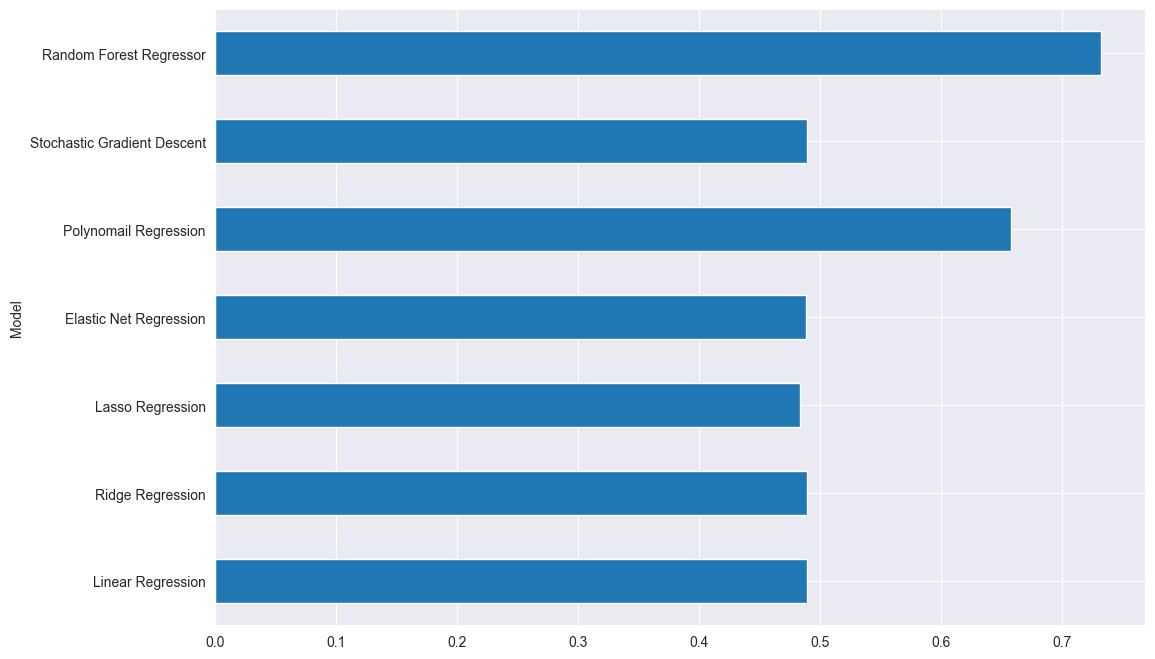

In [41]:
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))